<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 1 </div>
<div style="text-align: right"> <font color='Gray'> Constanza Rivas Ortega </div>

    
***


## Modelo del votante

El modelo del votante o $\textit{voter model}$ es uno de los modelos más simples para describir dinámicas de opinión. Tiene como objetivo describir la formación de consensos de opiniones en una población. Una ventaja de este modelo es que, al ser tan simple, puede ser resuelto en dimensiones espaciales arbitrarias.

El sistema consiste de un número $N^2$ de agentes o individuos sin carácter, esto es, las decisiones que toma cada uno es puramente por imitación. Cada uno de los individuos toma una decisión binaria de qué opinión tener en base a la opinión que tienen sus primeros vecinos. A medida que pasa el tiempo y como los individuos se van copiando la opinión entre ellos, finalmente todos terminan teniendo la misma opinión. Cuando la opinión de todos los agentes converge a una misma es cuando decimos que el sistema llegó al $\textbf{consenso}$.

La evolución temporal de la distribución de probabilidad $P(s,t)$ de que todos los individuos del sistema se encuentren en una configuración $s$ en un tiempo $t$ está dada por

$\frac{d}{dt} P(s) = - \sum_x w_x (s) P(s) + \sum_x w_x (s^x) P (s^x)$.

El tiempo que los individuos tardan en llegar al consenso depende del tamaño del sistema, la dimensión y el número de opiniones que se pueden tomar. La manera en que transcurren los pasos temporales en el modelo es mediante la interacción de los individuos que componen el sistema.

## Simulación

La simulación consiste en el modelo del votante en dos dimensiones, con condiciones de borde periódicas y un tamaño de $N=10$.

Cada paso temporal equivale a una interacción de un agente aleatorio con uno de sus primeros vecinos. Esto ocurre de la siguiente forma: primero se elige un agente aleatorio del sistema, luego se elige nuevamente de forma aleatoria uno de sus primeros vecinos, se compara la opinión de estos dos agentes y, finalmente, el agente inicial decide cuál será su opinión dependiendo de cuál es la opinión de su vecino.

Realizando este procedimiento una cantidad $ts$ de pasos temporales, se obtiene una imagen de como varían los estados iniciales y finales del sistema. Además de esto, se grafica el comportamiento del consenso con el paso del tiempo.

  0%|          | 0/100 [00:00<?, ?it/s]

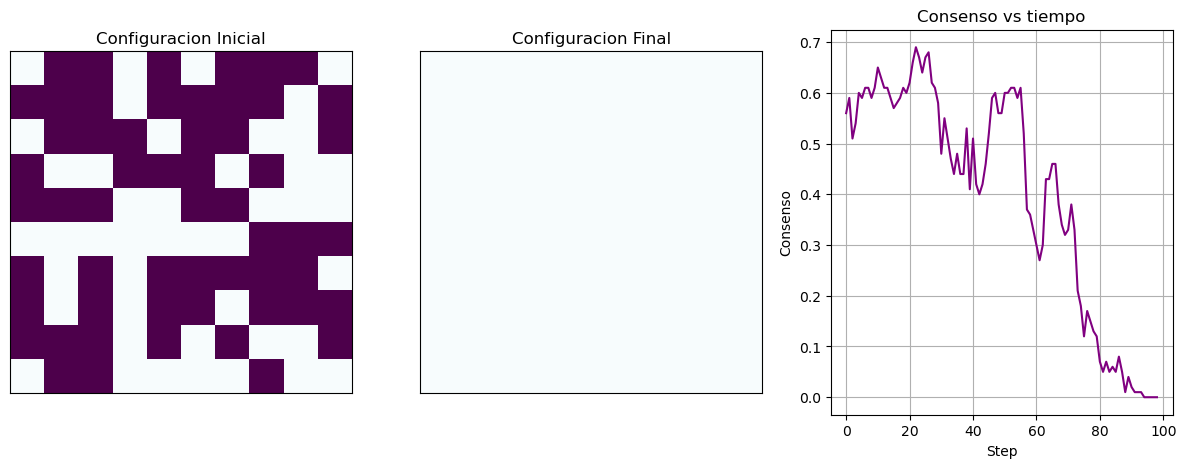

Tiempo ocupado (h:m:s:ns): 0:00:00.859701


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from tqdm.auto import tqdm

# PARAMETROS
N = 10 # tamaño del sistema
ts = 100 # numero de pasos temporales

# INICIO CONTADOR TEMPORAL
tini = datetime.now()
    
# CONFIGURACION FIGURA
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
    
# CONDICION INICIAL
agentes = np.random.choice(np.array([0,1]),size=(N,N)) # grilla con agentes en estado aleatorio
agentes_ts = [0]*(ts) # lista que guardara el sistema todos los pasos temporales
agentes_ts[0] = agentes
M = [0] * ts # lista que guardara la magnetizacion
    
# FIGURA ESTADO INICIAL
ax1.matshow(agentes, cmap ='BuPu')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Configuracion Inicial")
    
#ALGORITMO
t = 0
for t in tqdm(range(ts)):
    M[t] = np.sum(agentes)
        
    for n in range(N**2):
        i, j = np.random.randint(N), np.random.randint(N) # elige un agente en la posicion (i,j) aleatoriamente
        vecinos = [agentes[(i-1)%N, j], agentes[(i+1)%N, j], agentes[i, (j-1)%N], agentes[i, (j+1)%N]]
        vecino = np.random.choice(vecinos)
        if agentes[i][j] == vecino:
            agentes[i][j] = agentes[i][j]
        else:
            agentes[i][j] = vecino
    agentes_ts[t] = [agentes]
    t += 1
        
# FIGURA ESTADO FINAL
if agentes.all() == 1:
    ax2.matshow(agentes, cmap = 'BuPu_r')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_title("Configuracion Final")
else:
    ax2.matshow(agentes, cmap = 'BuPu')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_title("Configuracion Final")
    
# FIGURA MAGNETIZACION
ax3.plot([M[i]/N**2 for i in range(ts-1)],color='purple')
ax3.set_xlabel("Step")
ax3.set_ylabel("Consenso")
ax3.set_title("Consenso vs tiempo")
ax3.grid(True)
    
plt.show()
    
# FIN CONTADOR TEMPORAL
tfin = datetime.now()
dtie = tfin - tini
print('Tiempo ocupado (h:m:s:ns):', dtie)    